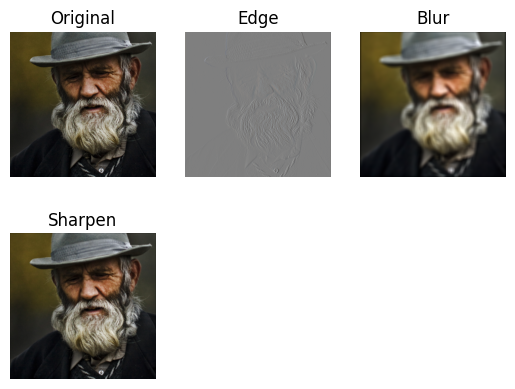

In [3]:
from kernels import Edge_detection, Blur, Sharpen, forward, tensor4plt, normalize_tensor, plot_tensors

if __name__ == "__main__":
    import torchvision
    import torch

    # Đọc ảnh và chuẩn bị tensor
    path = "my_img.jpg"
    tensor_img = torchvision.io.read_image(path)
    tensor_img = tensor_img.view(1, tensor_img.shape[0], tensor_img.shape[1], tensor_img.shape[2]).type(torch.float32)

    # Áp dụng kernel
    images = [tensor_img,
              forward(tensor_img, Edge_detection.sobel_x),
              forward(tensor_img, Blur.custom_mean_kernel(25)),
              forward(tensor_img, Sharpen.custom_sharpen(7, 25))]
    
    # Chuẩn hóa ảnh về khoảng [0, 1]
    for i in range(len(images)):    
        images[i] = normalize_tensor(images[i])
    
    # Plot ảnh
    plot_tensors(column = 3,
                 Original = images[0], Edge = images[1], Blur = images[2],
                 Sharpen = images[3])